DATA CREATION

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="D")
n = len(dates)

data = {
    'Date': dates,
    'Region': np.random.choice(['North', 'South', 'East', 'West'], n),
    'Sales': np.round(np.random.exponential(scale=2000, size=n), 2),
    'Units_Sold': np.random.randint(1, 50, size=n),
    'Product': np.random.choice(['A', 'B', 'C', 'D'], n)
}

df = pd.DataFrame(data)
df.to_csv("daily_sales_dashboard.csv", index=False)


## Tasks:
1. Create the following aggregated metrics:

    - Total sales per region
    - Average units per product
    - Monthly revenue trend

2. Create a dashboard with:

    - Line chart (monthly revenue)
    - Bar chart (sales by region)
    - Pie/donut (product share)
    - KPI boxes (e.g., total revenue, average units)

3. Use either Python (Plotly/Dash, Matplotlib, Seaborn)
or Power BI — your choice!

4. Interpret:

    - Which region is performing best?
    - Which product has the biggest share?
    - Is sales growing or declining over months?

In [2]:
df.head()

,Date,Region,Sales,Units_Sold,Product
0,2023-01-01,East,1559.36,34,B
1,2023-01-02,West,2380.04,3,D
2,2023-01-03,North,518.97,12,C
3,2023-01-04,East,384.63,1,C
4,2023-01-05,East,8053.56,44,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        365 non-null    datetime64[ns]
 1   Region      365 non-null    object        
 2   Sales       365 non-null    float64       
 3   Units_Sold  365 non-null    int32         
 4   Product     365 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(2)
memory usage: 13.0+ KB


In [14]:
# Total sales per region
df_sales_region = df.groupby('Region')['Sales'].sum()

In [15]:
# Average units per product
df_avg_units = df.groupby('Product')['Units_Sold'].mean()

In [16]:
df['Month']=df['Date'].dt.month
df.head()

,Date,Region,Sales,Units_Sold,Product,Month
0,2023-01-01,East,1559.36,34,B,1
1,2023-01-02,West,2380.04,3,D,1
2,2023-01-03,North,518.97,12,C,1
3,2023-01-04,East,384.63,1,C,1
4,2023-01-05,East,8053.56,44,B,1


In [17]:
# Monthly revenue trend
df_monthly = df.groupby('Month')['Sales'].sum()

In [18]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

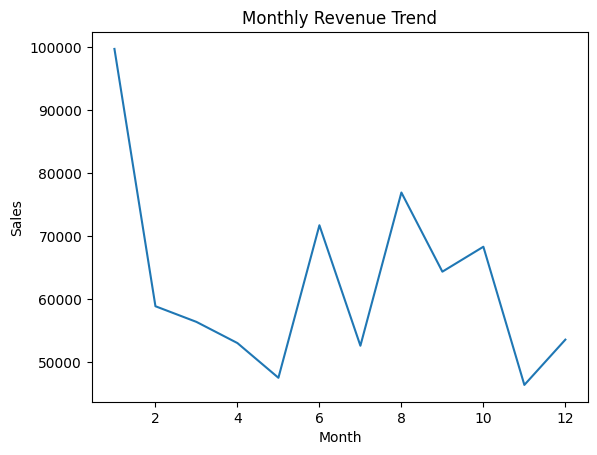

In [24]:
sns.lineplot(df_monthly)
plt.title('Monthly Revenue Trend')
plt.show()

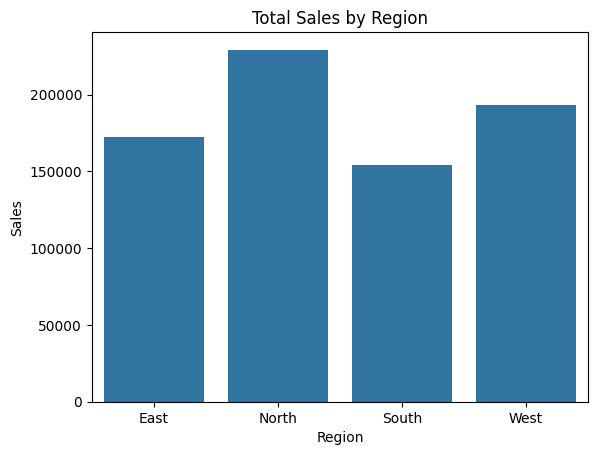

In [56]:
sns.barplot(x=df_sales_region.index, y=df_sales_region.values)
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.xlabel("Region")
plt.show()


In [41]:
df_avg_units

Product
A    23.723404
B    25.708333
C    22.354839
D    26.024390
Name: Units_Sold, dtype: float64

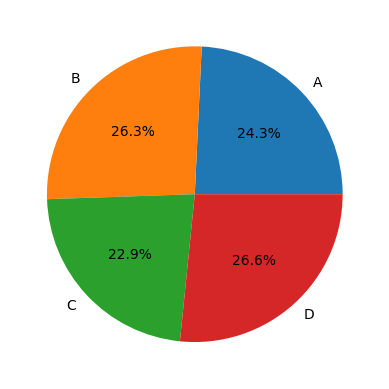

In [57]:
plt.pie(df_avg_units, labels=df_avg_units.index, autopct='%1.1f%%')
plt.show()

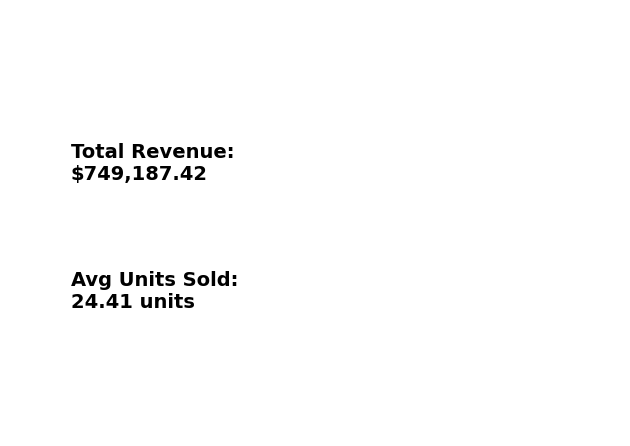

In [62]:
# KPI Dashboard
total_revenue = df['Sales'].sum()
average_units = df['Units_Sold'].mean()

plt.axis('off')
plt.text(0.1, 0.6, f"Total Revenue:\n${total_revenue:,.2f}", fontsize=14, weight='bold')
plt.text(0.1, 0.3, f"Avg Units Sold:\n{average_units:.2f} units", fontsize=14, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [64]:
product_counts = df['Product'].value_counts()
product_counts

Product
B    96
A    94
C    93
D    82
Name: count, dtype: int64

<Axes: xlabel='Region'>

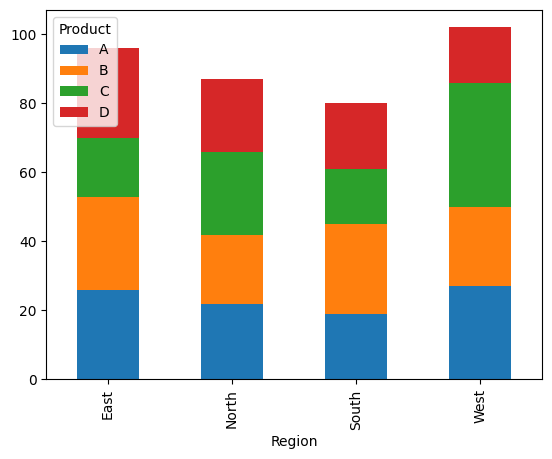

In [ ]:
df.groupby(['Region', 'Product']).size().unstack().plot(kind='bar', stacked=True)